Análise exploratória do Estado de São Paulo

Perfil dos condutores

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from unidecode import unidecode
from pathlib import Path

Funções 

In [114]:
# Função para listar os arquivos dentro do ZIP
def abrirZip(nome_zip):
    with zipfile.ZipFile(f'{nome_zip}.zip', 'r') as zip_ref:
        return zip_ref.namelist()  # Retorna a lista de arquivos no ZIP

# Função para ler um arquivo específico do ZIP
def lerArquivo(nome_zip, nome_arquivo):
    with zipfile.ZipFile(f'{nome_zip}.zip', 'r') as zip_ref:
        with zip_ref.open(nome_arquivo) as file:
            extensao = Path(nome_arquivo).suffix
            if extensao == '.csv':
                df = pd.read_csv(file, encoding='latin-1', sep=';')
            else:
                df=pd.read_excel(file)
    return df

In [15]:
perfil = pd.read_csv('acidentes_condutores_sp.csv',encoding = 'latin-1', sep = ';')
perfil.head(2)

,Unnamed: 0,Identificador do acidente,Identificador do condutor,Estado,Identificador do veículo,Tipo de veículo,Marca do veículo,Envolvido,Estado físico do condutor,Idade,Gênero
0,17,571786,1269062,SP,1018282,Motocicleta,YAMAHA/FAZER YS250,Condutor,Lesões Leves,41,Masculino
1,27,571790,1269058,SP,1018280,Automóvel,FIAT/ARGO DRIVE 1.0,Condutor,Ileso,32,Feminino


In [16]:
#A maioria dos condutores envolvido em acidentes são do sexo masculino.
perfil['Gênero'].value_counts().to_frame()

,count
Gênero,
Masculino,3770
Feminino,535
Não Informado,343


In [23]:
perfil['Idade'].value_counts().to_frame()

,count
Idade,
41,480
28,130
39,130
26,129
35,129
...,...
90,1
85,1
80,1


In [18]:
#A maioria dos acidentes envolvem automóveis e motocicletas.
perfil['Tipo de veículo'].value_counts().head(10).to_frame()

,count
Tipo de veículo,
Automóvel,1770
Motocicleta,1236
Caminhão-trator,445
Caminhonete,357
Caminhão,343
Camioneta,148
Motoneta,107
Utilitário,75
Bicicleta,74


C:\Users\aneca\AppData\Local\Temp\ipykernel_16748\3950022900.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Idade', y='Gênero', data=perfil, palette='Set2')


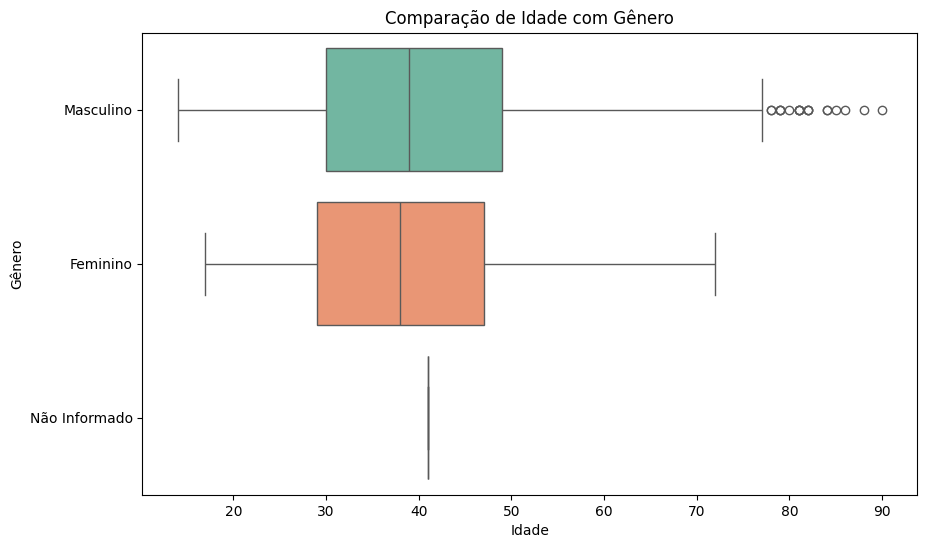

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Idade', y='Gênero', data=perfil, palette='Set2')
plt.title('Comparação de Idade com Gênero')
plt.xlabel('Idade')
plt.ylabel('Gênero')
plt.show()

C:\Users\aneca\AppData\Local\Temp\ipykernel_16748\2358660707.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Idade', y='Gênero', data=perfil, palette='Set2')


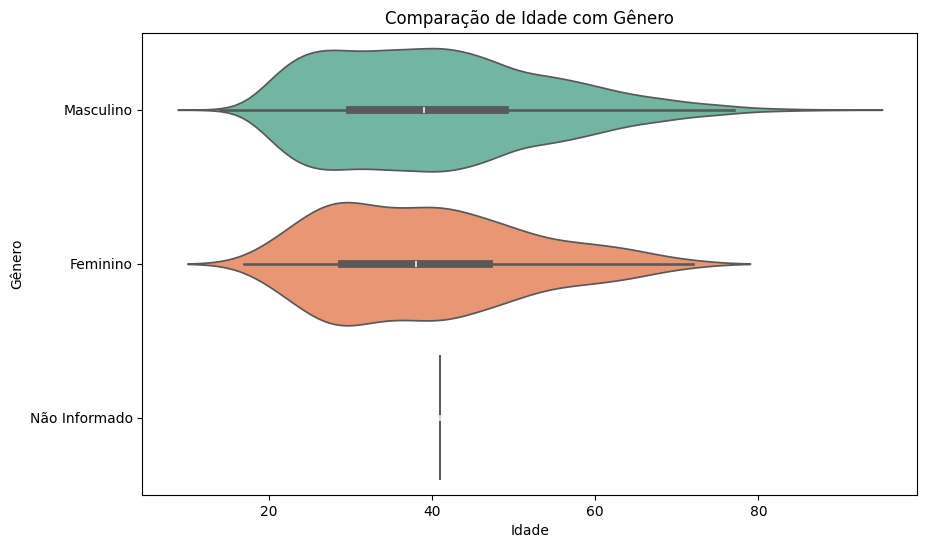

In [35]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Idade', y='Gênero', data=perfil, palette='Set2')
plt.title('Comparação de Idade com Gênero')
plt.xlabel('Idade')
plt.ylabel('Gênero')
plt.show()

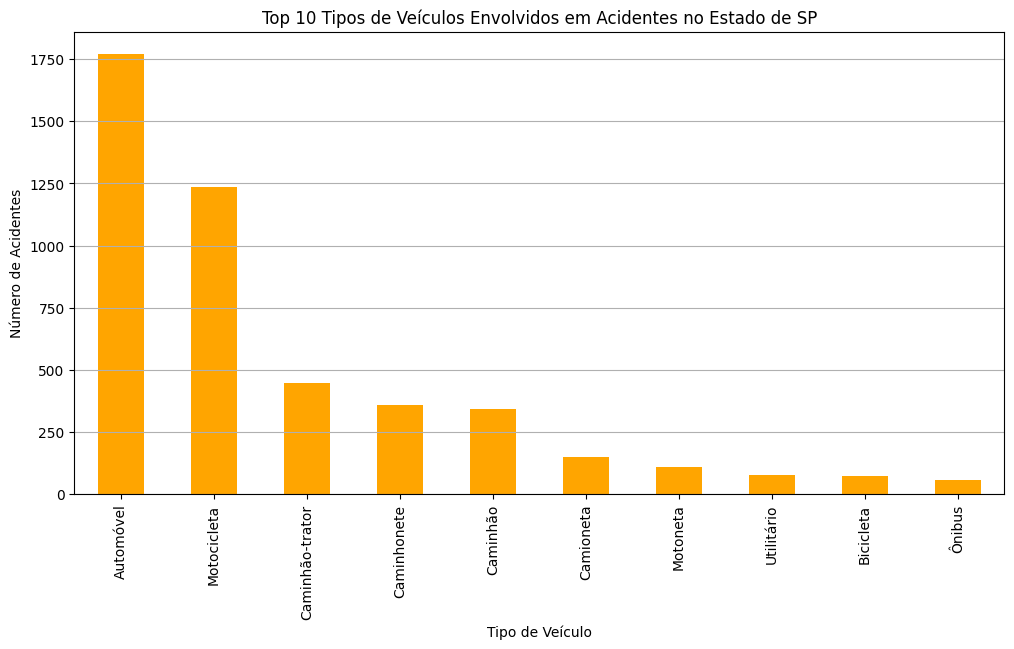

In [58]:
# Tipos de veículos envolvidos em acidentes no estado de SP
tipos_veiculo = perfil['Tipo de veículo'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
tipos_veiculo.plot(kind='bar', color='orange')
plt.title('Top 10 Tipos de Veículos Envolvidos em Acidentes no Estado de SP')
plt.xlabel('Tipo de Veículo')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

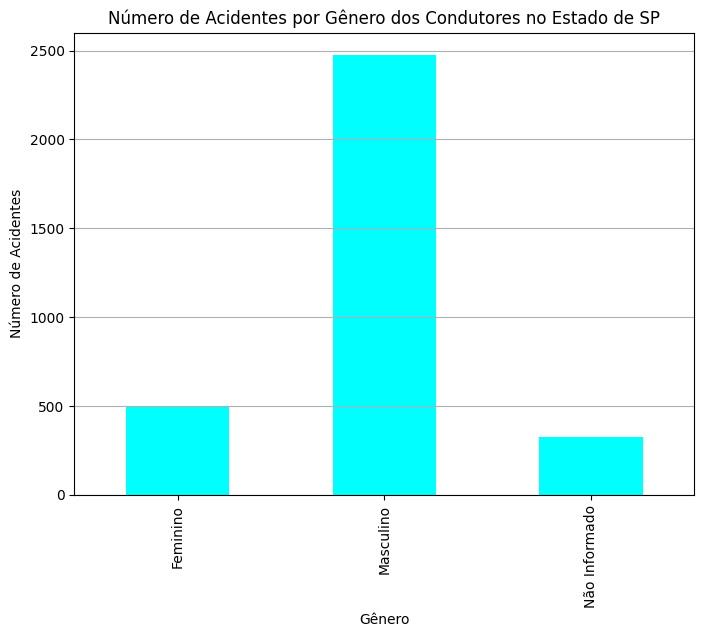

In [59]:
# Supondo que df_acidentes_condutores_sp seja o seu DataFrame
# Agrupar os dados pelo gênero e contar os identificadores de acidente
genero_condutores = perfil.groupby('Gênero')['Identificador do acidente'].nunique()

plt.figure(figsize=(8, 6))
genero_condutores.plot(kind='bar', color='cyan')
plt.title('Número de Acidentes por Gênero dos Condutores no Estado de SP')
plt.xlabel('Gênero')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

C:\Users\aneca\AppData\Local\Temp\ipykernel_16748\4258934539.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  acidentes_por_idade_genero = perfil.groupby(['Faixa Etária', 'Gênero'])['Identificador do acidente'].nunique().unstack(fill_value=0)


<Figure size 1200x600 with 0 Axes>

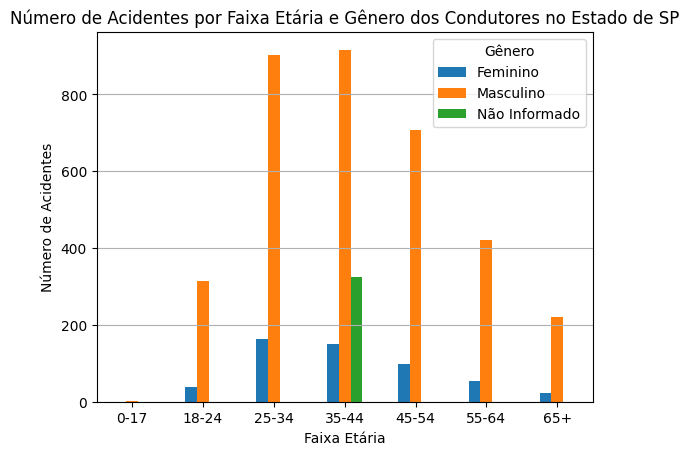

In [60]:
# 1. Criar faixas de idade
faixas_idade = [0, 17, 24, 34, 44, 54, 64, 100]
labels = ['0-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Criando a coluna de faixa etária
perfil['Faixa Etária'] = pd.cut(perfil['Idade'], bins=faixas_idade, labels=labels, right=False)

# Agrupando por faixa etária e gênero e contando os acidentes únicos
acidentes_por_idade_genero = perfil.groupby(['Faixa Etária', 'Gênero'])['Identificador do acidente'].nunique().unstack(fill_value=0)

# Plotando o gráfico
plt.figure(figsize=(12, 6))
acidentes_por_idade_genero.plot(kind='bar', stacked=False)
plt.title('Número de Acidentes por Faixa Etária e Gênero dos Condutores no Estado de SP')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=0)
plt.legend(title='Gênero')
plt.grid(axis='y')
plt.show()

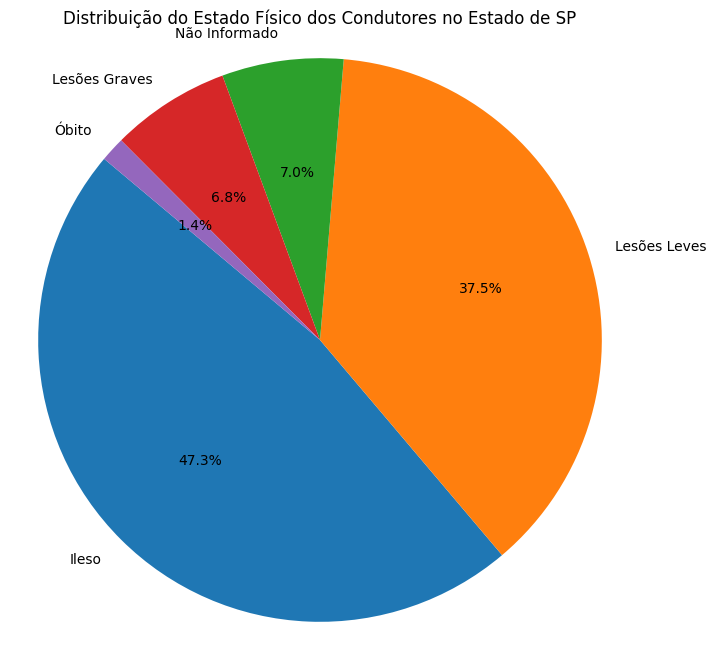

In [61]:
#Distribuição do estado físico dos candutores no estado de SP
estado_fisico = perfil['Estado físico do condutor'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(estado_fisico, labels=estado_fisico.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição do Estado Físico dos Condutores no Estado de SP')
plt.axis('equal')  # Para que o gráfico seja um círculo
plt.show()

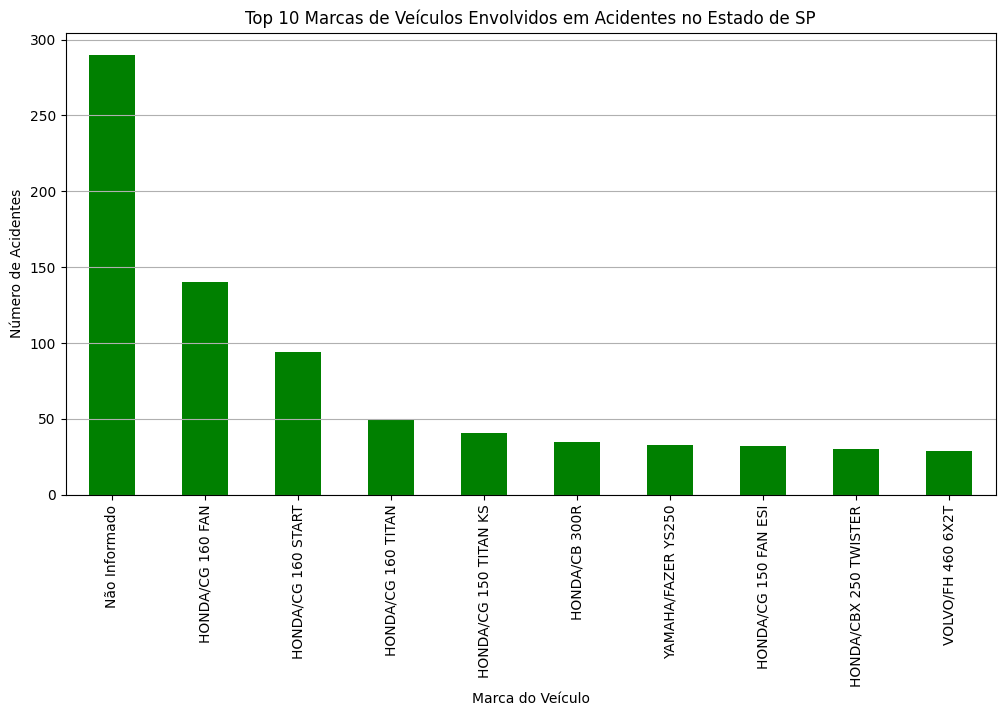

In [62]:
# Marcas de veículos envolvidos em acidentes no estado de SP
marcas_veiculo = perfil.groupby('Marca do veículo')['Identificador do acidente'].nunique().nlargest(10)

plt.figure(figsize=(12, 6))
marcas_veiculo.plot(kind='bar', color='green')
plt.title('Top 10 Marcas de Veículos Envolvidos em Acidentes no Estado de SP')
plt.xlabel('Marca do Veículo')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

Análise das ocorrências de acidentes

In [19]:
ocorrencias = pd.read_csv('acidentes_geral_sp.csv',encoding = 'latin-1', sep = ';')
ocorrencias.head(2)

,Unnamed: 0,Identificador do acidente,Data,Dia da semana,Horário,Estado,BR,km,Município,Causa do acidente,...,Fase do dia,Sentido da via,Condição do tempo,Tipo de pista,Traçado da via,uso_solo,Número de passageiros,Número de cavaleiro,Número de condutor,Número de pedestre
0,10,571786,2024-01-01,segunda-feira,03:00:00,SP,101.0,28.4,UBATUBA,Condutor Dormindo,...,Plena Noite,Crescente,Ensolarado,Simples,Reta,Rural,0,0,1,0
1,14,571790,2024-01-01,segunda-feira,02:50:00,SP,101.0,41.0,UBATUBA,Reação tardia ou ineficiente do condutor,...,Plena Noite,Crescente,Ensolarado,Simples,Curva,Rural,0,0,2,0


In [22]:
#Guarulhos é o município que mais tem acidentes no estado de São Paulo.
ocorrencias['Município'].value_counts().to_frame()

,count
Município,
GUARULHOS,531
SAO JOSE DOS CAMPOS,195
SAO PAULO,193
UBATUBA,151
CAJATI,141
...,...
CAMPOS NOVOS PAULISTA,2
GETULINA,2
PAULICEIA,1


In [21]:
#A BR 116 é a que mais tem acidentes no estado de São Paulo
ocorrencias['BR'].value_counts().to_frame()

,count
BR,
116.0,1951
381.0,390
153.0,240
101.0,150
459.0,18
488.0,12
262.0,5
158.0,1


In [24]:
ocorrencias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 2772 non-null   int64  
 1   Identificador do acidente  2772 non-null   int64  
 2   Data                       2772 non-null   object 
 3   Dia da semana              2772 non-null   object 
 4   Horário                    2772 non-null   object 
 5   Estado                     2772 non-null   object 
 6   BR                         2767 non-null   float64
 7   km                         2767 non-null   float64
 8   Município                  2772 non-null   object 
 9   Causa do acidente          2772 non-null   object 
 10  Tipo do acidente           2772 non-null   object 
 11  Gravidade do acidente      2772 non-null   object 
 12  Fase do dia                2772 non-null   object 
 13  Sentido da via             2772 non-null   objec

In [25]:
# Converter a coluna de datas para datetime
ocorrencias['Data'] = pd.to_datetime(ocorrencias['Data'])

# Extrair o mês
ocorrencias['mes'] = ocorrencias['Data'].dt.month

# 3. Contar o número de acidentes por mês
acidentes_por_mes = ocorrencias['mes'].value_counts().sort_index()

In [28]:
#Neste dados só temos informações de janeiro a julho de 2024. Todos os meses tem mais ou menos a mesma quantidade de acidentes.
acidentes_por_mes.to_frame()

,count
mes,
1,405
2,358
3,397
4,385
5,412
6,402
7,413


In [27]:
#A maior parte dos acidentes acontecem durante o amanhecer e pleno dia.
ocorrencias['Fase do dia'].value_counts().to_frame()

,count
Fase do dia,
Pleno dia,1539
Plena Noite,931
Amanhecer,159
Anoitecer,143


In [36]:
#Colisão traseira se destaca entre os tipos de acidente
ocorrencias['Tipo do acidente'].value_counts().to_frame()

,count
Tipo do acidente,
Colisão traseira,707
Colisão lateral mesmo sentido,430
Tombamento,301
Colisão com objeto,286
Saída de leito carroçável,251
Queda de ocupante de veículo,189
Atropelamento de Pedestre,131
Colisão transversal,129
Engavetamento,99


In [39]:
#As causas mais comuns de acidentes são reação tardia ou ineficiente do condutor e ausência de reação do condutor.
ocorrencias['Causa do acidente'].value_counts().head(10).to_frame()

,count
Causa do acidente,
Reação tardia ou ineficiente do condutor,758
Ausência de reação do condutor,502
Manobra de mudança de faixa,175
Condutor deixou de manter distância do veículo da frente,156
Trafegar com motocicleta (ou similar) entre as faixas,139
Acessar a via sem observar a presença dos outros veículos,133
Demais falhas mecânicas ou elétricas,131
Velocidade Incompatível,94
Ingestão de álcool pelo condutor,81


In [42]:
ocorrencias['Gravidade do acidente'].value_counts().to_frame()

,count
Gravidade do acidente,
Com Vítimas Feridas,2241
Sem Vítimas,405
Com Vítimas Fatais,126


In [44]:
#Com vítimas feridas, destacam-se em relação ao sem vítimas e os fatais.
ocorrencias['Gravidade do acidente'].value_counts(normalize=True).to_frame()

,proportion
Gravidade do acidente,
Com Vítimas Feridas,0.808442
Sem Vítimas,0.146104
Com Vítimas Fatais,0.045455


In [45]:
#Grande parte acontece em condições meteorológica normal.
ocorrencias['Condição do tempo'].value_counts().to_frame()

,count
Condição do tempo,
Ensolarado,1817
Nublado,484
Chuvoso,400
Não Informado,33
Nevoeiro/Neblina,30
Vento,7
Neve,1


In [46]:
#Por incrível que pareça, grande parte do acidentes ocorrem em pistas duplas e múltiplas.
ocorrencias['Tipo de pista'].value_counts().to_frame()

,count
Tipo de pista,
Dupla,1600
Múltipla,710
Simples,462


In [47]:
#Bem distribuído
ocorrencias['uso_solo'].value_counts().to_frame()

,count
uso_solo,
Urbano,1426
Rural,1346


In [48]:
ocorrencias['Sentido da via'].value_counts().to_frame()

,count
Sentido da via,
Crescente,1441
Decrescente,1326
Não Informado,5


In [49]:
ocorrencias['Traçado da via'].value_counts().to_frame()

,count
Traçado da via,
Reta,1736
Curva,276
Reta;Aclive,142
Curva;Declive,125
Reta;Declive,119
...,...
Interseção de Vias;Declive;Curva,1
Curva;Declive;Viaduto,1
Em Obras;Aclive;Reta,1


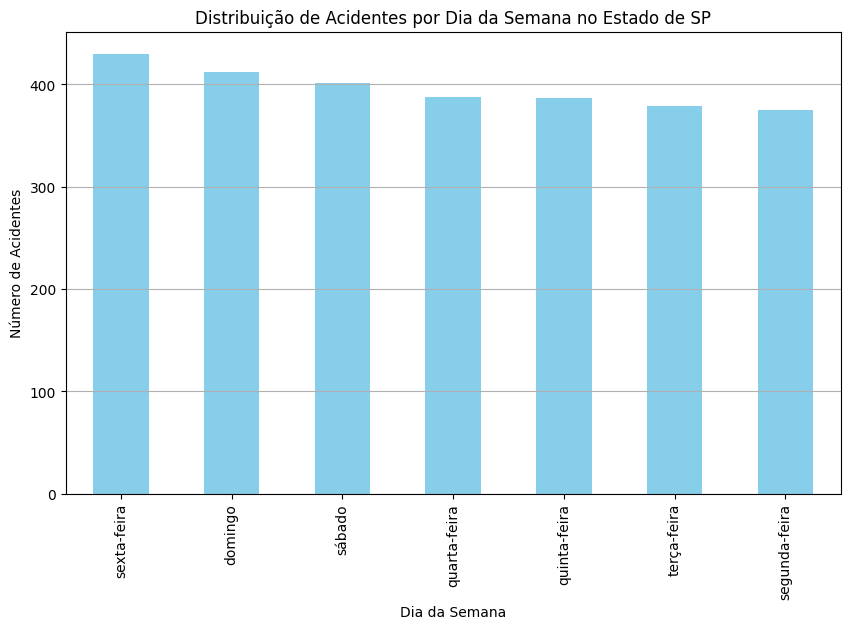

In [50]:
# Distribuição de acidentes por dia da semana no Estado de SP
acidentes_por_dia = ocorrencias['Dia da semana'].value_counts()

plt.figure(figsize=(10, 6))
acidentes_por_dia.plot(kind='bar', color='skyblue')
plt.title('Distribuição de Acidentes por Dia da Semana no Estado de SP')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

In [51]:
ocorrencias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Unnamed: 0                 2772 non-null   int64         
 1   Identificador do acidente  2772 non-null   int64         
 2   Data                       2772 non-null   datetime64[ns]
 3   Dia da semana              2772 non-null   object        
 4   Horário                    2772 non-null   object        
 5   Estado                     2772 non-null   object        
 6   BR                         2767 non-null   float64       
 7   km                         2767 non-null   float64       
 8   Município                  2772 non-null   object        
 9   Causa do acidente          2772 non-null   object        
 10  Tipo do acidente           2772 non-null   object        
 11  Gravidade do acidente      2772 non-null   object        
 12  Fase d

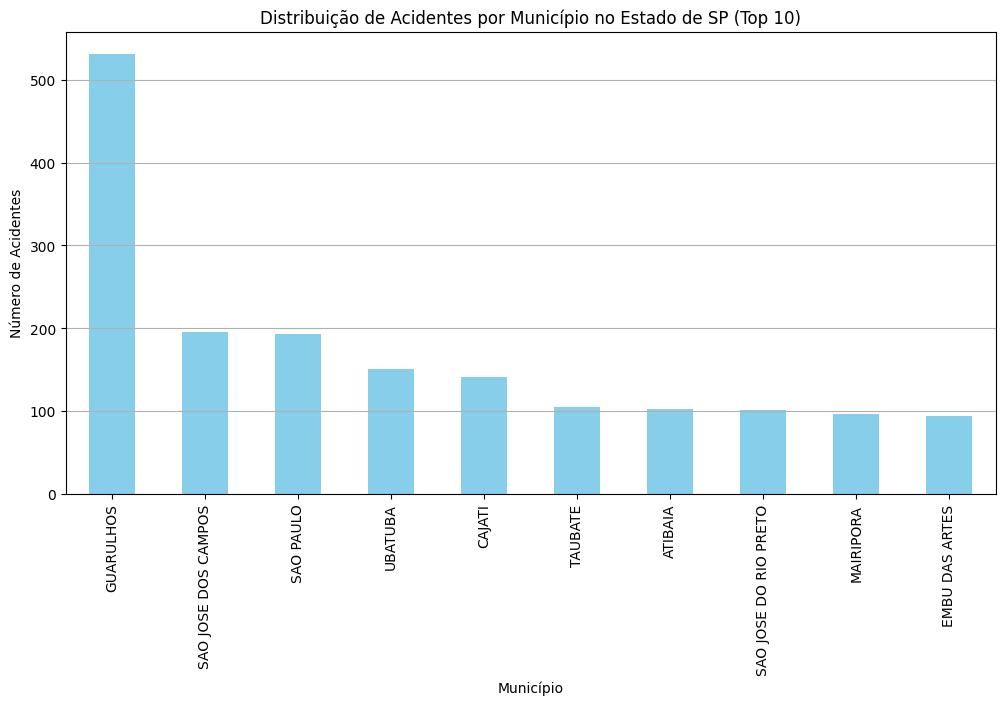

In [52]:
# Distribuição de acidentes por município no estado de SP
acidentes_por_municipio = ocorrencias['Município'].value_counts().head(10)  # Para mostrar os 10 primeiros

plt.figure(figsize=(12, 6))
acidentes_por_municipio.plot(kind='bar', color='skyblue')
plt.title('Distribuição de Acidentes por Município no Estado de SP (Top 10)')
plt.xlabel('Município')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

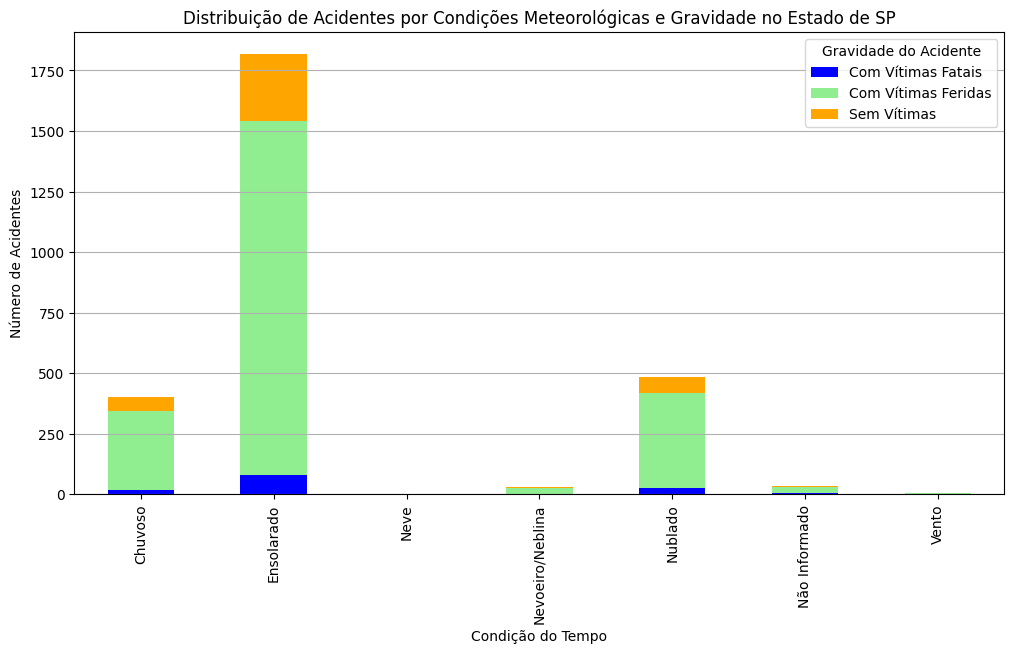

In [53]:
# Distribuição de acidentes por condições meteorológicas e gravidade no estado de SP
contagem = ocorrencias.groupby(['Condição do tempo', 'Gravidade do acidente']).size().unstack().head(10) 

contagem.plot(kind='bar', stacked=True, figsize=(12, 6), color=['blue', 'lightgreen', 'orange', 'red'])
plt.title('Distribuição de Acidentes por Condições Meteorológicas e Gravidade no Estado de SP')
plt.xlabel('Condição do Tempo')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=90)
plt.legend(title='Gravidade do Acidente')
plt.grid(axis='y')
plt.show()

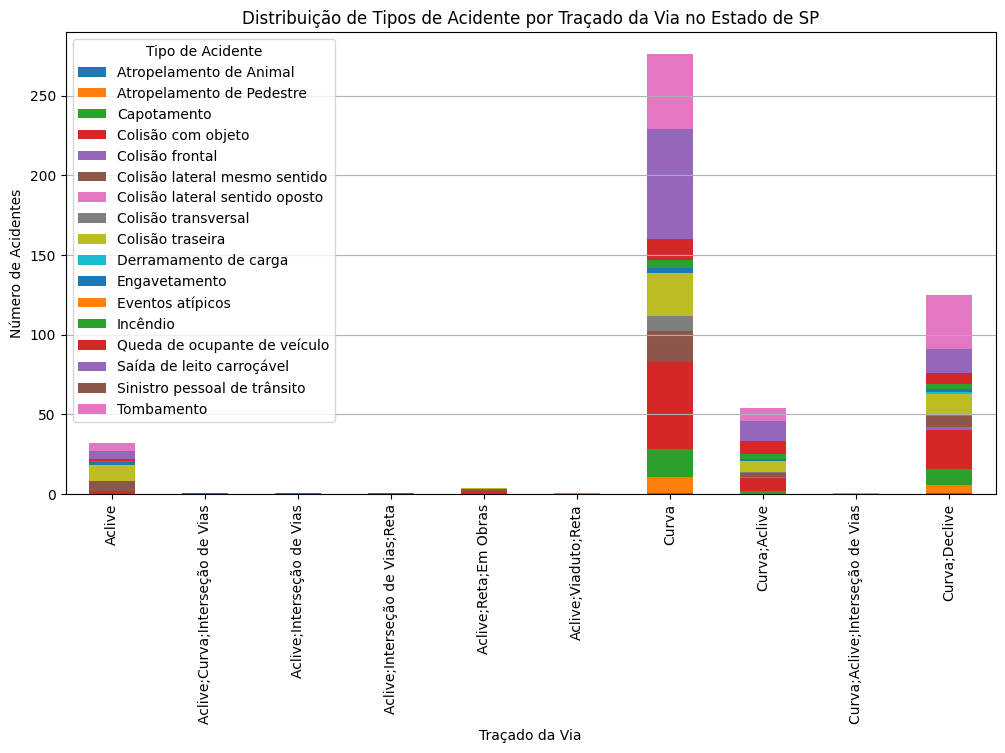

In [54]:
# Distribição de tipos de acidente por traçado da via no estado de SP
contagem = ocorrencias.groupby(['Traçado da via', 'Tipo do acidente']).size().unstack().head(10) 

contagem.plot(kind='bar', stacked=True, figsize=(12, 6), color=plt.cm.tab10.colors)
plt.title('Distribuição de Tipos de Acidente por Traçado da Via no Estado de SP')
plt.xlabel('Traçado da Via')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=90)
plt.legend(title='Tipo de Acidente')
plt.grid(axis='y')
plt.show()

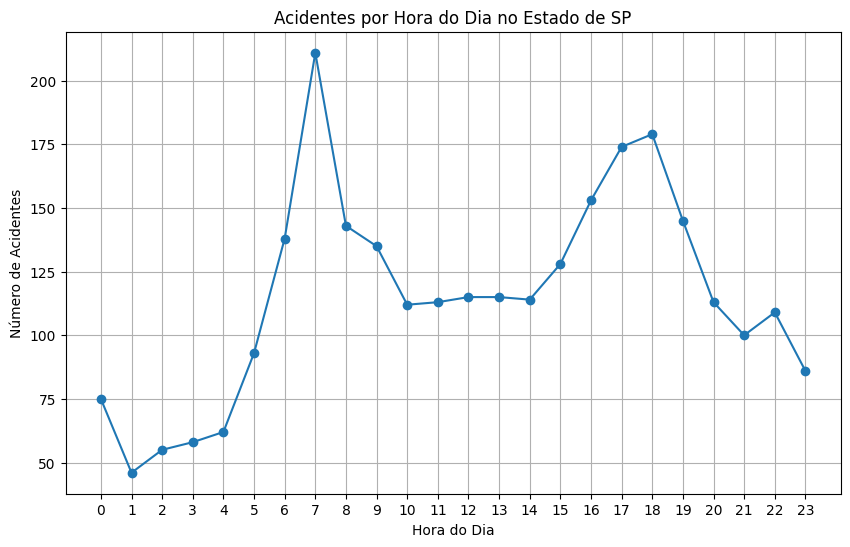

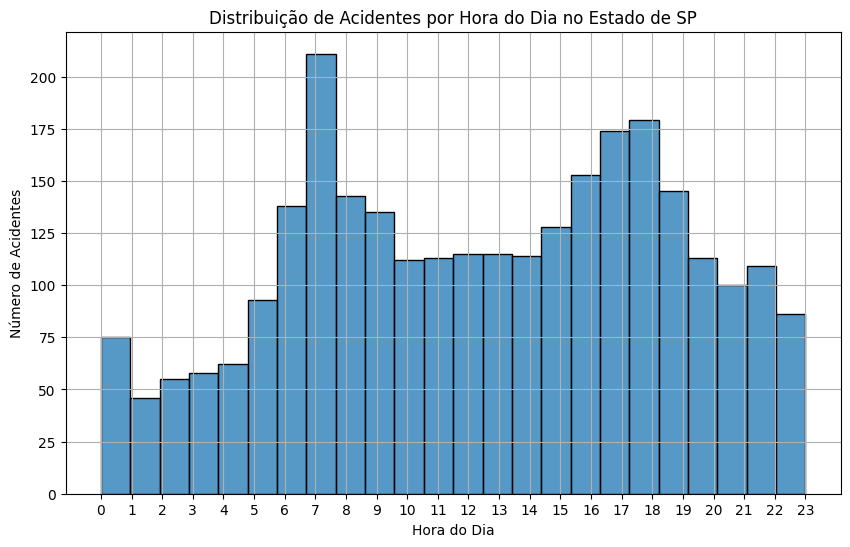

In [55]:
# Acidentes por hora do dia no estado de SP
df_df_gráfico = pd.DataFrame(ocorrencias)

df_df_gráfico['Horário'] = pd.to_datetime(df_df_gráfico['Horário'], format='%H:%M:%S', errors='coerce')

df_df_gráfico['Hora'] = df_df_gráfico['Horário'].dt.hour

acidentes_por_hora = df_df_gráfico['Hora'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(acidentes_por_hora.index, acidentes_por_hora.values, marker='o', linestyle='-')
plt.title('Acidentes por Hora do Dia no Estado de SP')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Acidentes')
plt.xticks(range(24))  # Mostra todas as horas do dia
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df_df_gráfico['Hora'], bins=24, kde=False)
plt.title('Distribuição de Acidentes por Hora do Dia no Estado de SP')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Acidentes')
plt.xticks(range(24))  # Mostra todas as horas do dia
plt.grid()
plt.show()

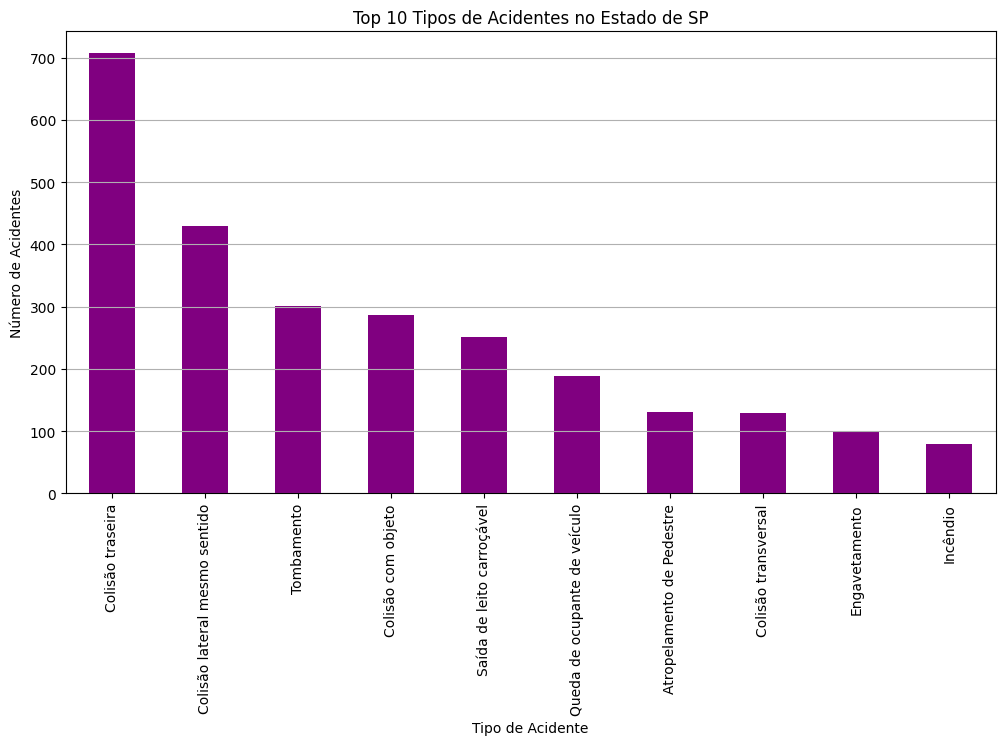

In [56]:
# Tipos de acidentes no estado de SP
tipos_acidentes = ocorrencias['Tipo do acidente'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
tipos_acidentes.plot(kind='bar', color='purple')
plt.title('Top 10 Tipos de Acidentes no Estado de SP')
plt.xlabel('Tipo de Acidente')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

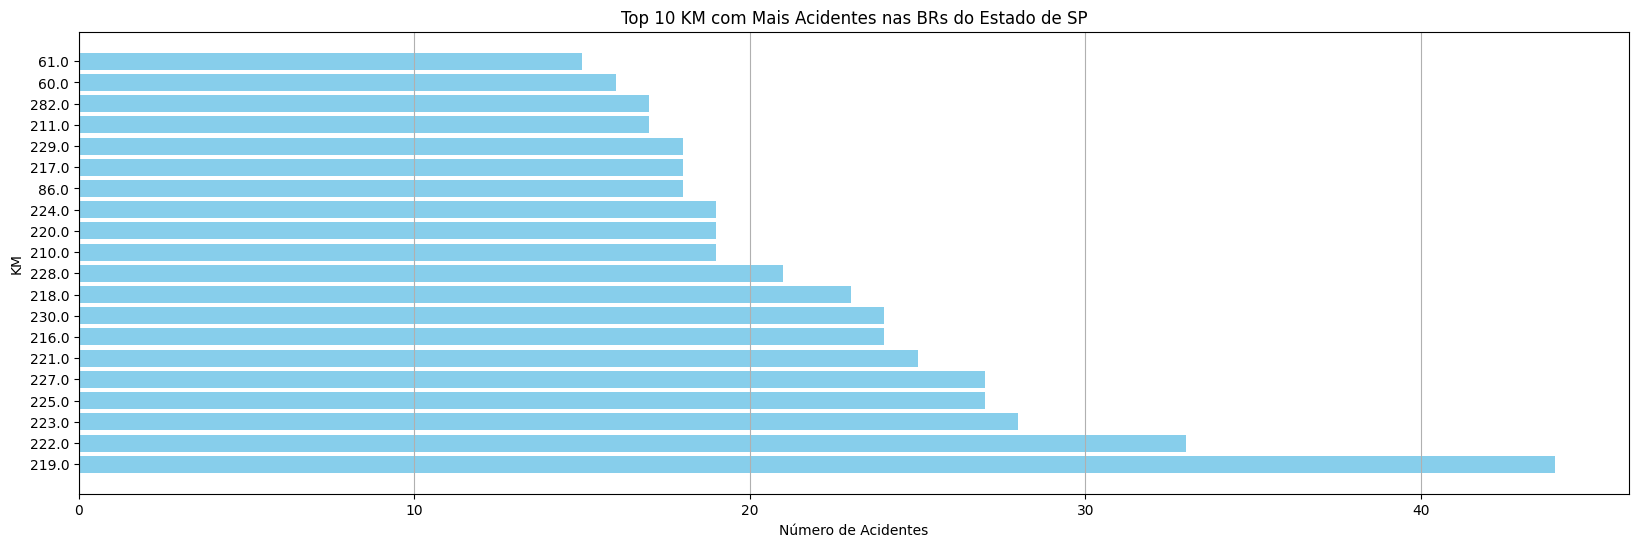

In [57]:
# Top 10 km com mais acidentes nas BRs do estado de SP
acidentes_por_km = ocorrencias.groupby('km').size().reset_index(name='Número de Acidentes')

top_10_acidentes = acidentes_por_km.nlargest(20, 'Número de Acidentes')

plt.figure(figsize=(20, 6))
plt.barh(top_10_acidentes['km'].astype(str), top_10_acidentes['Número de Acidentes'], color='skyblue')
plt.title('Top 10 KM com Mais Acidentes nas BRs do Estado de SP')
plt.xlabel('Número de Acidentes')
plt.ylabel('KM')
plt.grid(axis='x')
plt.show()

C:\Users\aneca\AppData\Local\Temp\ipykernel_16748\988093767.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  acidentes_por_mes = df_df_df.resample('M', on='Data')['Identificador do acidente'].count()


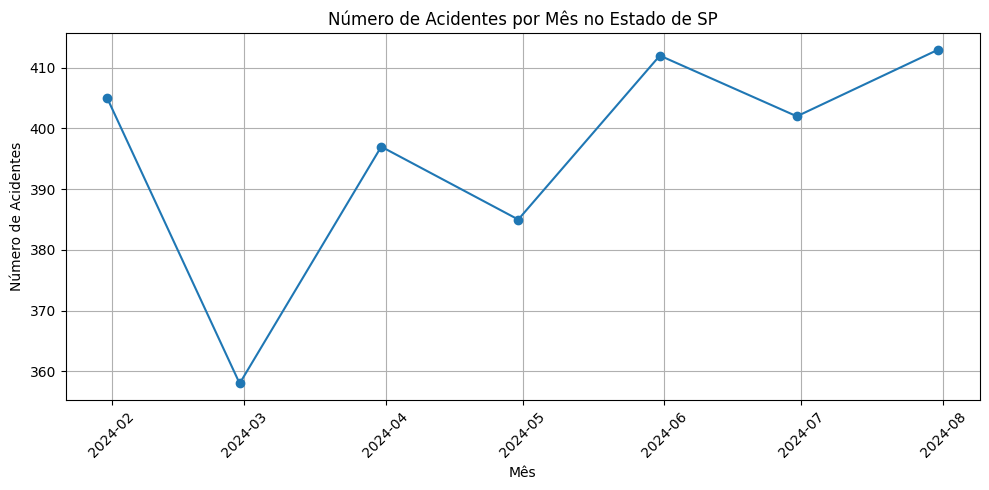

In [63]:
# Número de acidentes por mês no estado de SP
df_df_df = pd.DataFrame(ocorrencias)

df_df_df['Data'] = pd.to_datetime(df_df_df['Data'])

acidentes_por_mes = df_df_df.resample('M', on='Data')['Identificador do acidente'].count()

plt.figure(figsize=(10, 5
                   ))
plt.plot(acidentes_por_mes.index, acidentes_por_mes.values, marker='o')
plt.title('Número de Acidentes por Mês no Estado de SP')
plt.xlabel('Mês')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

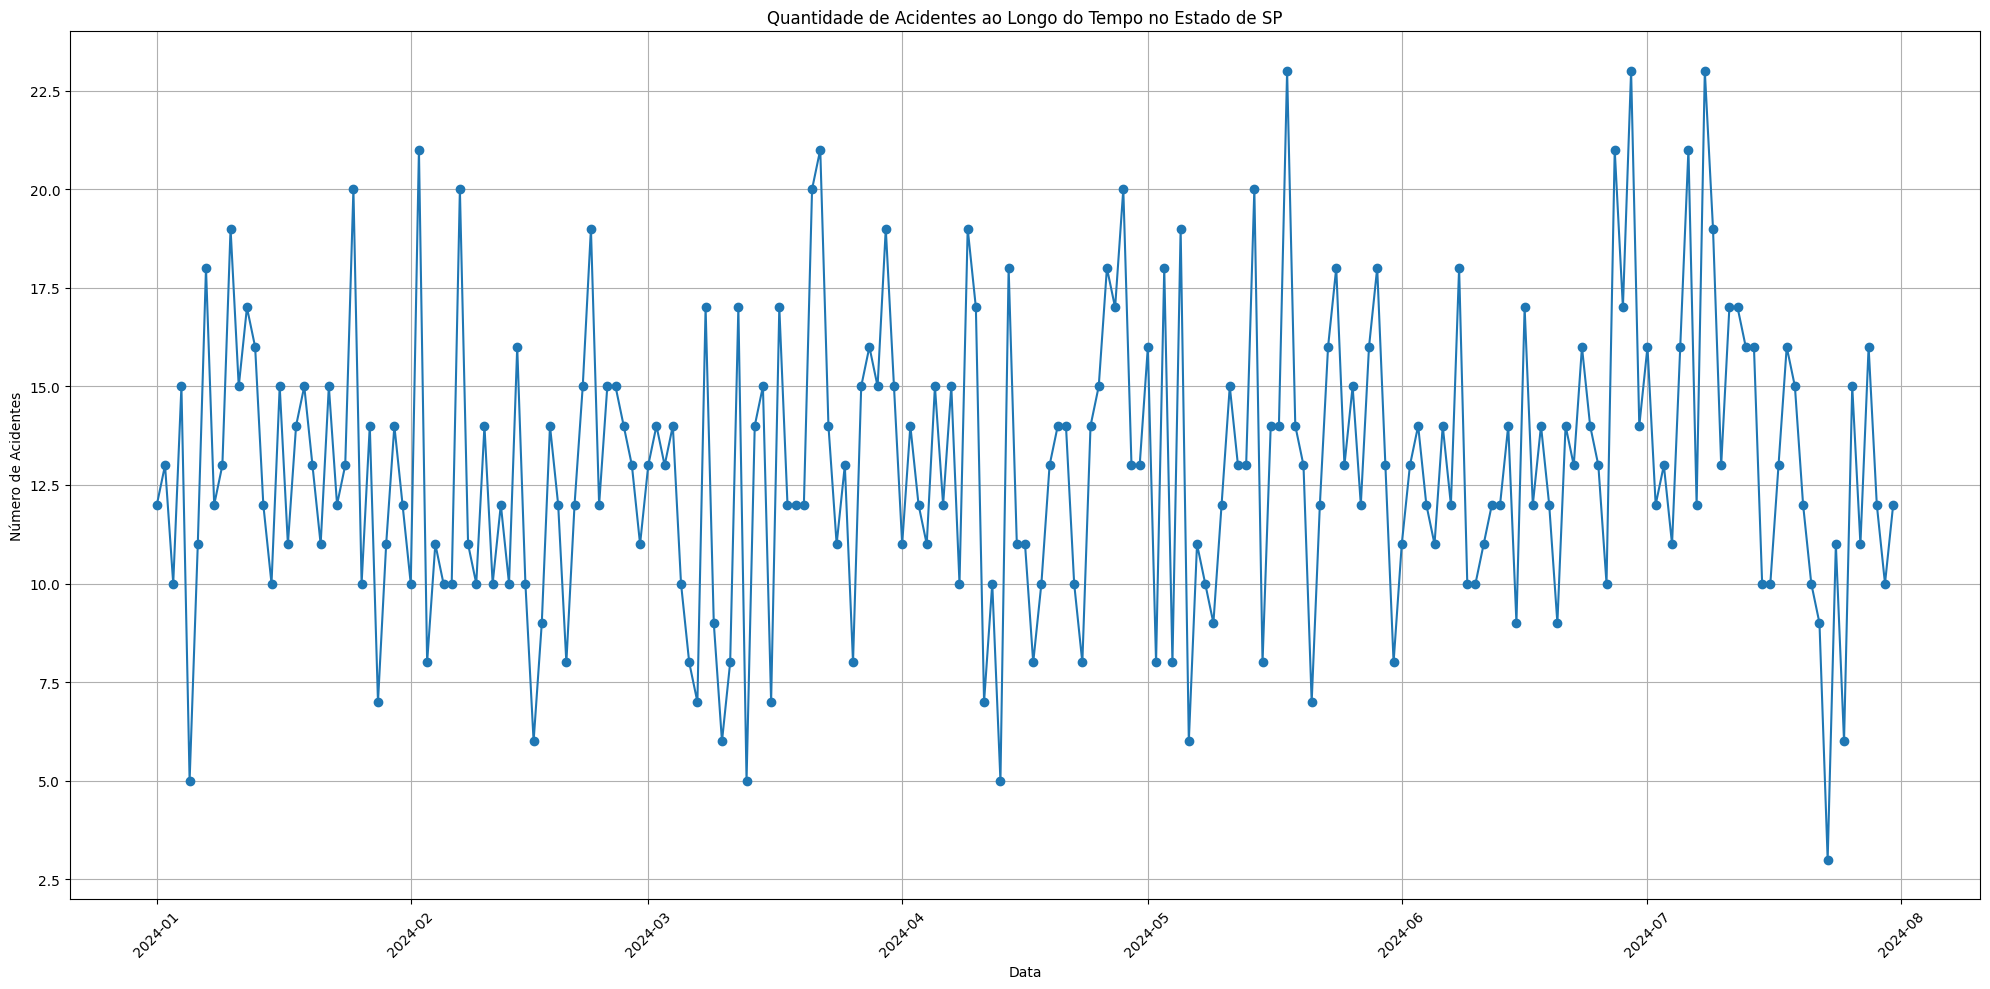

In [67]:
# Quantidade de Acidente ao longo do tempo no estado de SP
df_df_df['Data'] = pd.to_datetime(df_df_df['Data'])

acidentes_por_data = df_df_df.groupby('Data').size().reset_index(name='Número de Acidentes')

plt.figure(figsize=(20, 10))
plt.plot(acidentes_por_data['Data'], acidentes_por_data['Número de Acidentes'], marker='o')
plt.title('Quantidade de Acidentes ao Longo do Tempo no Estado de SP')
plt.xlabel('Data')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Número de Acidentes')

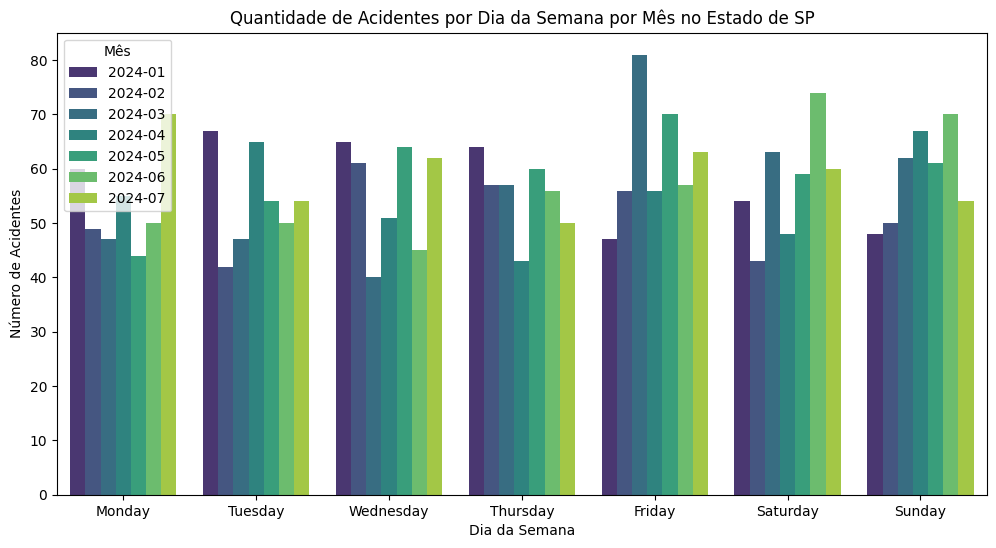

In [68]:
# Representar a quantidade de acidente por dia da semana por mês no estado de São Paulo
df_df_df['Data'] = pd.to_datetime(df_df_df['Data'])

df_df_df['Mês'] = df_df_df['Data'].dt.to_period('M')
df_df_df['Dia da Semana'] = df_df_df['Data'].dt.day_name()

acidentes_por_dia = df_df_df.groupby(['Mês', 'Dia da Semana']).size().reset_index(name='Número de Acidentes')

dias_da_semana = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
acidentes_por_dia['Dia da Semana'] = pd.Categorical(acidentes_por_dia['Dia da Semana'], categories=dias_da_semana, ordered=True)

plt.figure(figsize=(12, 6))
sns.barplot(data=acidentes_por_dia, x='Dia da Semana', y='Número de Acidentes', hue='Mês', palette='viridis')
plt.title('Quantidade de Acidentes por Dia da Semana por Mês no Estado de SP')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Acidentes')

Análisando a BR - 116

In [69]:
#Filtrei apenas os dados referente à BR com maior quantidade de acidentes (116) para analisar mais de perto os dados.
df_BR_acidente =  ocorrencias[ocorrencias['BR'] == 116]

In [70]:
df_BR_acidente['Data'].value_counts().to_frame()

,count
Data,
2024-07-08,20
2024-01-25,18
2024-02-02,18
2024-05-18,17
2024-03-22,16
...,...
2024-02-16,4
2024-03-10,3
2024-05-06,3


In [71]:
df_BR_acidente['Dia da semana'].value_counts().to_frame()

,count
Dia da semana,
sexta-feira,315
domingo,291
quarta-feira,278
quinta-feira,278
segunda-feira,268
terça-feira,263
sábado,258


In [72]:
df_BR_acidente['Horário'].value_counts().to_frame()

,count
Horário,
07:00:00,40
07:30:00,35
18:00:00,30
09:00:00,29
17:00:00,29
...,...
08:57:00,1
00:08:00,1
07:29:00,1


In [73]:
df_BR_acidente['km'].value_counts().to_frame()

,count
km,
219.0,44
222.0,33
223.0,28
225.0,27
227.0,27
...,...
48.9,1
147.6,1
92.3,1


In [75]:
df_BR_acidente['Município'].value_counts().to_frame().head(10)

,count
Município,
GUARULHOS,495
SAO JOSE DOS CAMPOS,195
CAJATI,141
TAUBATE,104
EMBU DAS ARTES,94
SAO PAULO,89
MIRACATU,82
BARRA DO TURVO,77
ITAPECERICA DA SERRA,74


In [76]:
df_BR_acidente['Causa do acidente'].value_counts().head(10).to_frame()

,count
Causa do acidente,
Reação tardia ou ineficiente do condutor,588
Ausência de reação do condutor,370
Manobra de mudança de faixa,135
Trafegar com motocicleta (ou similar) entre as faixas,124
Condutor deixou de manter distância do veículo da frente,107
Demais falhas mecânicas ou elétricas,87
Velocidade Incompatível,70
Acessar a via sem observar a presença dos outros veículos,60
Avarias e/ou desgaste excessivo no pneu,41


In [79]:
df_BR_acidente['Tipo do acidente'].value_counts().head(14).to_frame()

,count
Tipo do acidente,
Colisão traseira,524
Colisão lateral mesmo sentido,335
Colisão com objeto,207
Tombamento,202
Saída de leito carroçável,176
Queda de ocupante de veículo,152
Atropelamento de Pedestre,89
Engavetamento,72
Incêndio,55


In [80]:
df_BR_acidente['Gravidade do acidente'].value_counts().to_frame()

,count
Gravidade do acidente,
Com Vítimas Feridas,1615
Sem Vítimas,252
Com Vítimas Fatais,84


In [81]:
df_BR_acidente['Gravidade do acidente'].value_counts(normalize=True).to_frame()

,proportion
Gravidade do acidente,
Com Vítimas Feridas,0.827781
Sem Vítimas,0.129165
Com Vítimas Fatais,0.043055


In [82]:
df_BR_acidente['Fase do dia'].value_counts().to_frame()

,count
Fase do dia,
Pleno dia,1043
Plena Noite,680
Amanhecer,127
Anoitecer,101


In [83]:
df_BR_acidente['Condição do tempo'].value_counts().to_frame()

,count
Condição do tempo,
Ensolarado,1215
Nublado,373
Chuvoso,299
Não Informado,30
Nevoeiro/Neblina,26
Vento,7
Neve,1


In [84]:
df_BR_acidente['Tipo de pista'].value_counts().to_frame()

,count
Tipo de pista,
Dupla,1193
Múltipla,613
Simples,145


In [85]:
df_BR_acidente['uso_solo'].value_counts().to_frame()

,count
uso_solo,
Urbano,1033
Rural,918


In [87]:
df_BR_acidente['Traçado da via'].value_counts().to_frame().head(10)

,count
Traçado da via,
Reta,1291
Curva,196
Reta;Aclive,84
Curva;Declive,80
Reta;Declive,72
Reta;Em Obras,47
Curva;Aclive,33
Declive,26
Aclive,22


C:\Users\aneca\AppData\Local\Temp\ipykernel_16748\1765689831.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BR_acidente['Data'] = pd.to_datetime(df_BR_acidente['Data'], format='%Y-%m-%d')


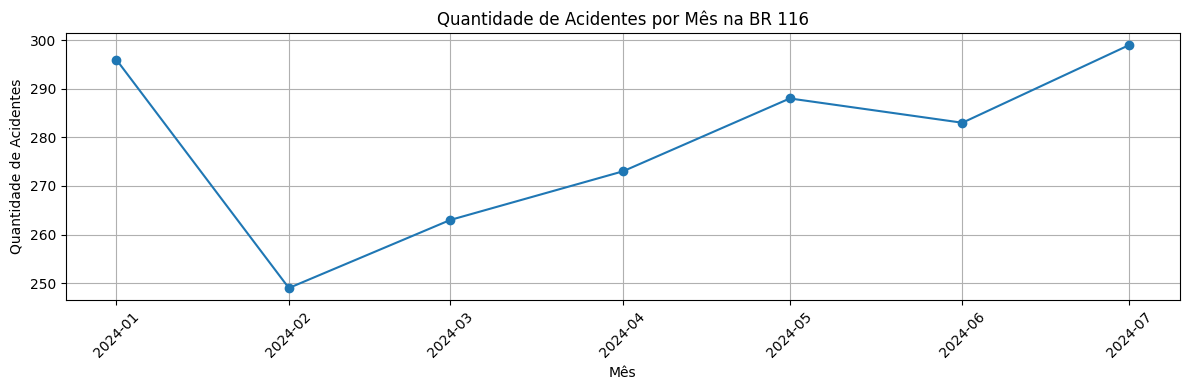

In [88]:
# Quantidade de acidentes por mês na BR 116

df_BR_acidente['Data'] = pd.to_datetime(df_BR_acidente['Data'], format='%Y-%m-%d')  

acidentes_por_mes = df_BR_acidente.groupby(df_BR_acidente['Data'].dt.to_period('M')).size().reset_index(name='Quantidade')

acidentes_por_mes['Data'] = acidentes_por_mes['Data'].dt.to_timestamp()

plt.figure(figsize=(12, 4))
plt.plot(acidentes_por_mes['Data'], acidentes_por_mes['Quantidade'], marker='o')

plt.title('Quantidade de Acidentes por Mês na BR 116')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Acidentes')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

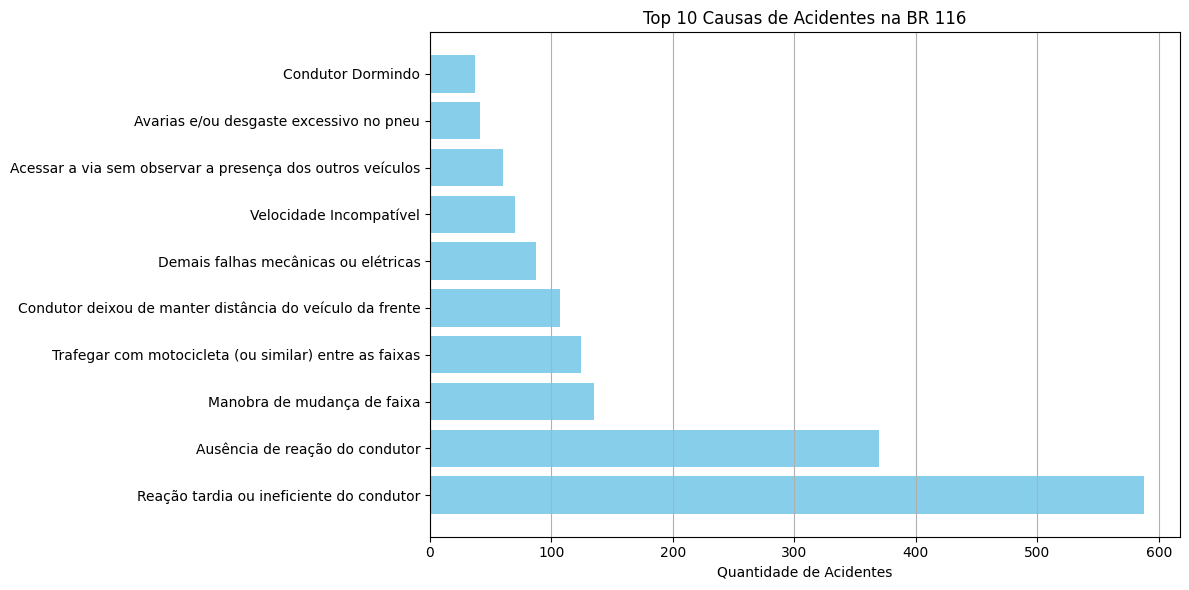

In [89]:
#Principais causas de acidentes na BR 116
acidentes_por_causa = df_BR_acidente['Causa do acidente'].value_counts().reset_index()
acidentes_por_causa.columns = ['Causa', 'Quantidade']

top_10_causas = acidentes_por_causa.nlargest(10, 'Quantidade')

plt.figure(figsize=(12, 6))
plt.barh(top_10_causas['Causa'], top_10_causas['Quantidade'], color='skyblue')
plt.xlabel('Quantidade de Acidentes')
plt.title('Top 10 Causas de Acidentes na BR 116')
plt.grid(axis='x')

plt.tight_layout()
plt.show()

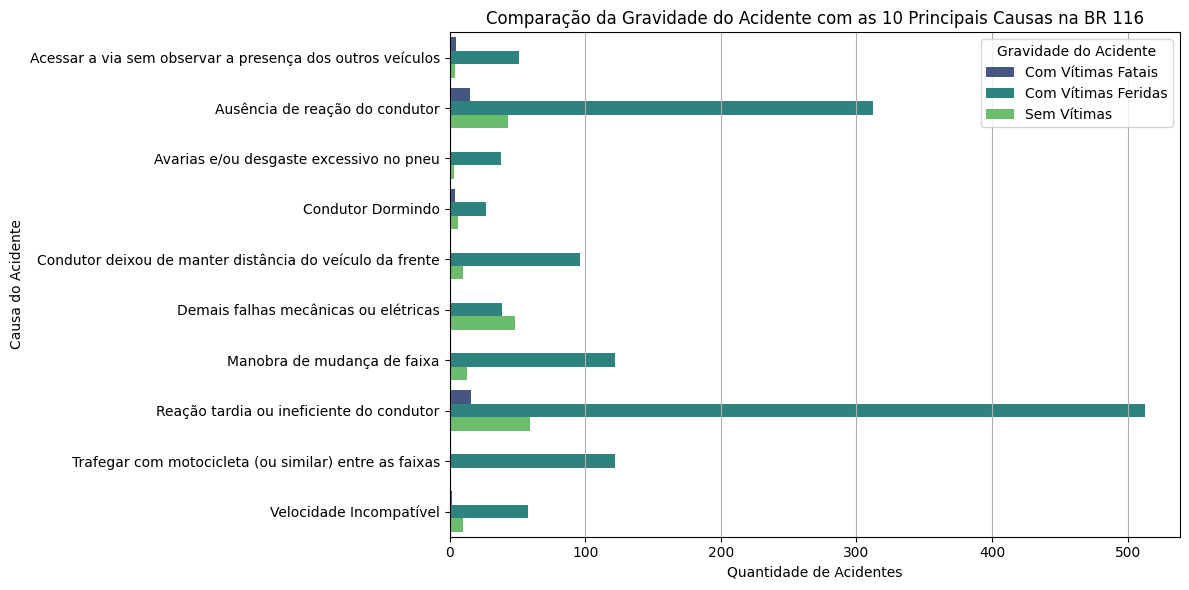

In [90]:
#Comparação da gravidade do acidente com as principais causas na BR 116
acidentes_por_causa = df_BR_acidente['Causa do acidente'].value_counts().reset_index()
acidentes_por_causa.columns = ['Causa', 'Quantidade']

top_10_causas = acidentes_por_causa.nlargest(10, 'Quantidade')

df_top_10 = df_BR_acidente[df_BR_acidente['Causa do acidente'].isin(top_10_causas['Causa'])]

acidentes_por_causa_gravidade = df_top_10.groupby(['Causa do acidente', 'Gravidade do acidente']).size().reset_index(name='Quantidade')

plt.figure(figsize=(12, 6))
sns.barplot(data=acidentes_por_causa_gravidade, x='Quantidade', y='Causa do acidente', hue='Gravidade do acidente', palette='viridis')

plt.title('Comparação da Gravidade do Acidente com as 10 Principais Causas na BR 116')
plt.xlabel('Quantidade de Acidentes')
plt.ylabel('Causa do Acidente')
plt.legend(title='Gravidade do Acidente')
plt.grid(axis='x')
plt.tight_layout()

plt.show()

C:\Users\aneca\AppData\Local\Temp\ipykernel_16748\4207078438.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BR_acidente['Data'] = pd.to_datetime(df_BR_acidente['Data'])


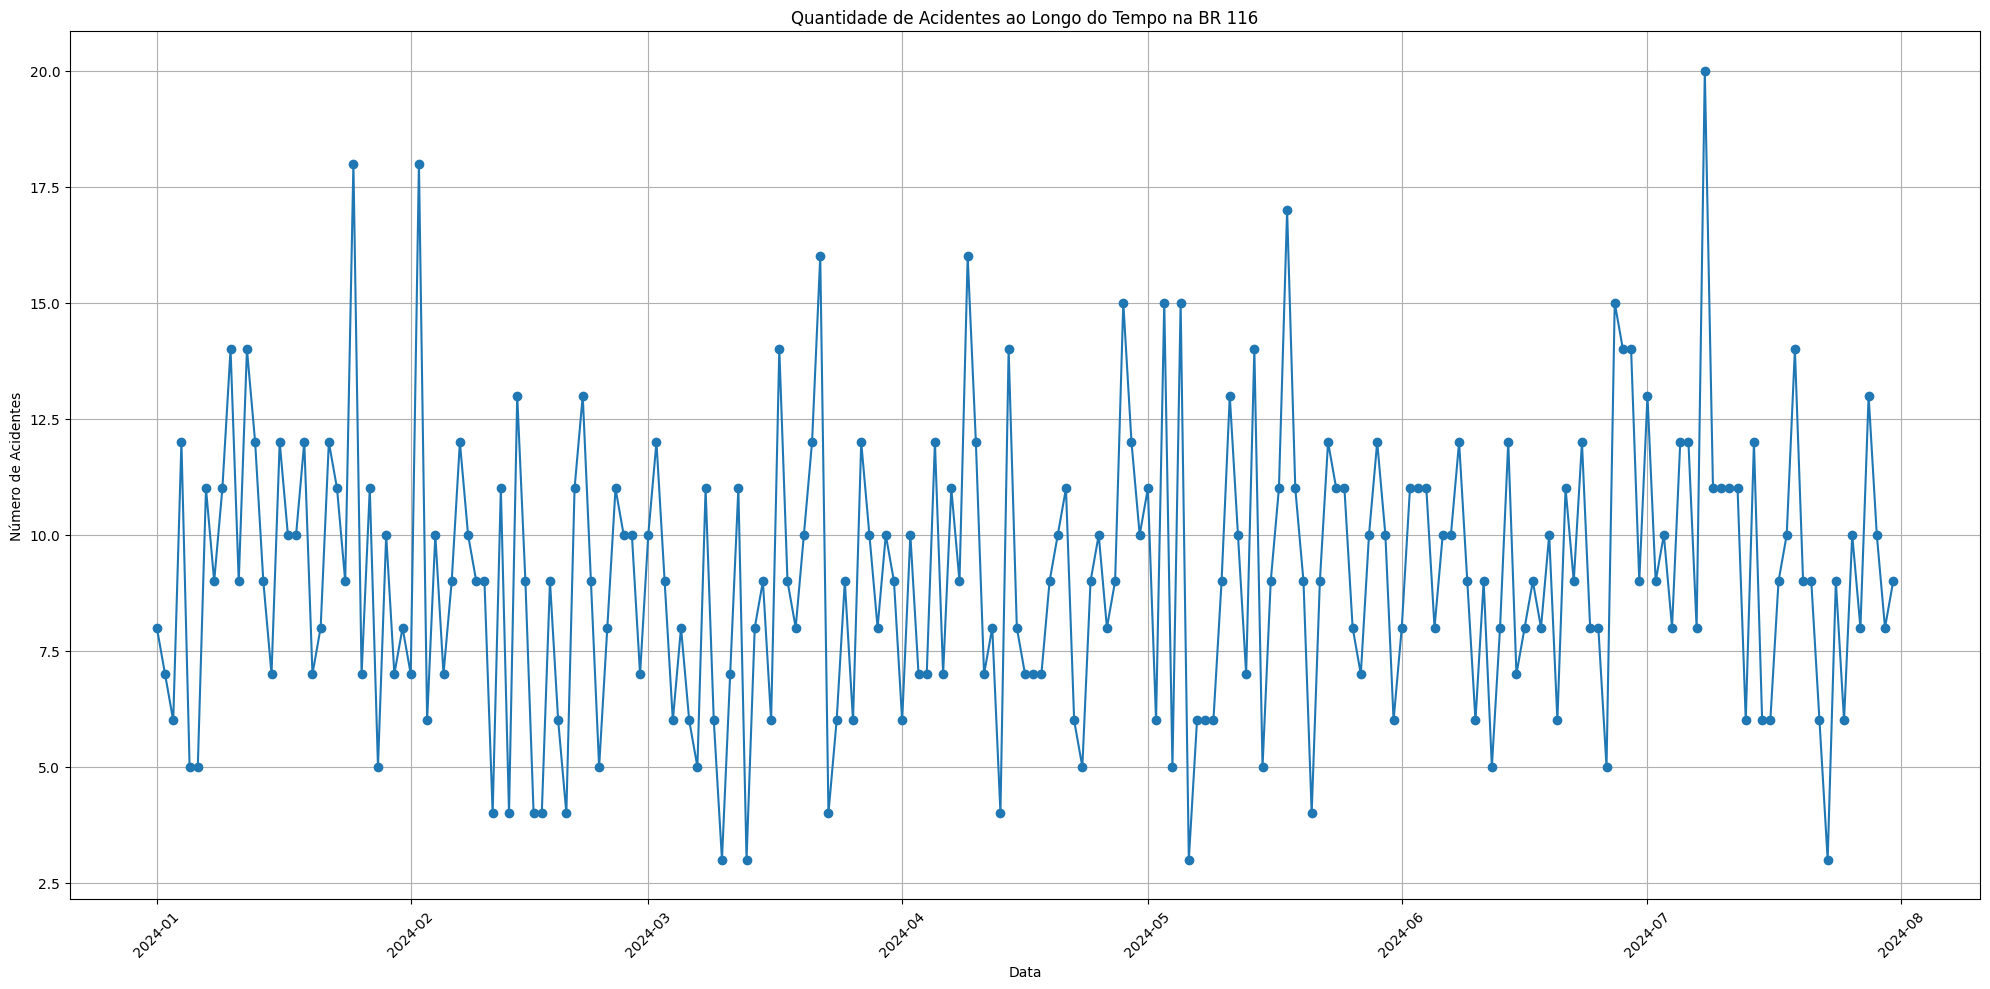

In [92]:
#Quantidade de acidentes ao longo do tempo na BR 116
df_BR_acidente['Data'] = pd.to_datetime(df_BR_acidente['Data'])

acidentes_por_data = df_BR_acidente.groupby('Data').size().reset_index(name='Número de Acidentes')

plt.figure(figsize=(20, 10))
plt.plot(acidentes_por_data['Data'], acidentes_por_data['Número de Acidentes'], marker='o')
plt.title('Quantidade de Acidentes ao Longo do Tempo na BR 116')
plt.xlabel('Data')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

C:\Users\aneca\AppData\Local\Temp\ipykernel_16748\1917486872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BR_acidente['Data'] = pd.to_datetime(df_BR_acidente['Data'])
C:\Users\aneca\AppData\Local\Temp\ipykernel_16748\1917486872.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BR_acidente['Mês'] = df_BR_acidente['Data'].dt.to_period('M')
C:\Users\aneca\AppData\Local\Temp\ipykernel_16748\1917486872.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Text(0, 0.5, 'Número de Acidentes')

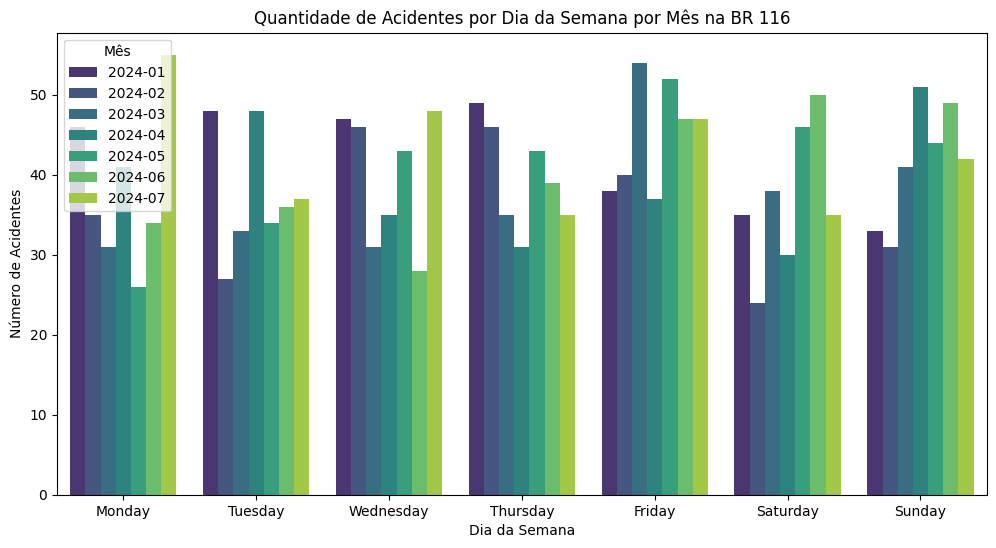

In [93]:
# Quantidade de acidente por dia da semana por mês na BR 116
df_BR_acidente['Data'] = pd.to_datetime(df_BR_acidente['Data'])

df_BR_acidente['Mês'] = df_BR_acidente['Data'].dt.to_period('M')
df_BR_acidente['Dia da Semana'] = df_BR_acidente['Data'].dt.day_name()

acidentes_por_dia = df_BR_acidente.groupby(['Mês', 'Dia da Semana']).size().reset_index(name='Número de Acidentes')

dias_da_semana = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
acidentes_por_dia['Dia da Semana'] = pd.Categorical(acidentes_por_dia['Dia da Semana'], categories=dias_da_semana, ordered=True)

plt.figure(figsize=(12, 6))
sns.barplot(data=acidentes_por_dia, x='Dia da Semana', y='Número de Acidentes', hue='Mês', palette='viridis')
plt.title('Quantidade de Acidentes por Dia da Semana por Mês na BR 116')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Acidentes')

C:\Users\aneca\AppData\Local\Temp\ipykernel_16748\2979993279.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BR_acidente['Horário'] = pd.to_datetime(df_BR_acidente['Horário'], format='%H:%M:%S', errors='coerce')
C:\Users\aneca\AppData\Local\Temp\ipykernel_16748\2979993279.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BR_acidente['Hora'] = df_BR_acidente['Horário'].dt.hour


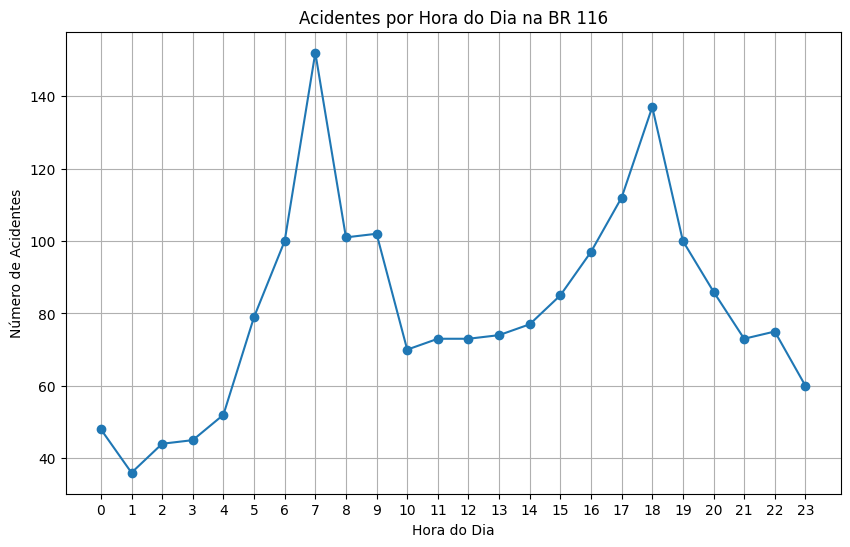

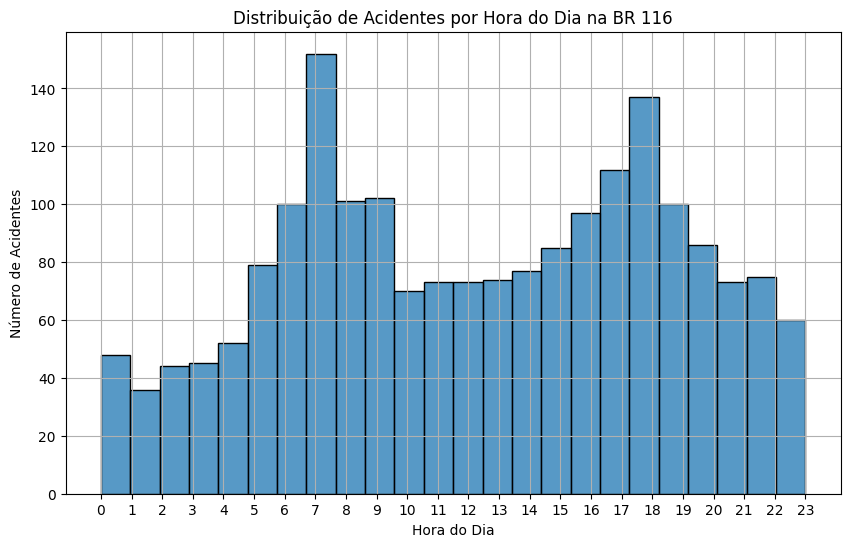

In [94]:
#Acidente por hora do dia n BR 116
df_BR_acidente['Horário'] = pd.to_datetime(df_BR_acidente['Horário'], format='%H:%M:%S', errors='coerce')

df_BR_acidente['Hora'] = df_BR_acidente['Horário'].dt.hour

acidentes_por_hora = df_BR_acidente['Hora'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(acidentes_por_hora.index, acidentes_por_hora.values, marker='o', linestyle='-')
plt.title('Acidentes por Hora do Dia na BR 116')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Acidentes')
plt.xticks(range(24))  # Mostra todas as horas do dia
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df_BR_acidente['Hora'], bins=24, kde=False)
plt.title('Distribuição de Acidentes por Hora do Dia na BR 116')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Acidentes')
plt.xticks(range(24))  # Mostra todas as horas do dia
plt.grid()
plt.show()

In [122]:
abrirZip('população')

['estimativa_dou_2024.xlsx',
 'estimativa_pop_indicadores_esp (1).csv',
 'tabela_corrigida.csv']

In [123]:
df_estima = lerArquivo("população", 'estimativa_pop_indicadores_esp (1).csv')
df_estima.head(3)

,ano,cod_ibge,nome_mun,populacao,homens,mulheres,razao_sexo,id_media,dens_demog
0,2000.0,3500105.0,Adamantina,33484.0,16318.0,17166.0,"105,2","33,7","81,3"
1,2000.0,3500204.0,Adolfo,3680.0,1868.0,1812.0,97,"32,2","17,4"
2,2000.0,3500303.0,Aguaí,28145.0,14109.0,14036.0,"99,5","30,3","59,3"


In [124]:
df_estima_2023 =  df_estima[ df_estima['ano'] == 2023.00]

In [125]:

df_estima_2023['nome_mun'] = df_estima_2023['nome_mun'].apply(lambda x: unidecode(x).upper())

C:\Users\aneca\AppData\Local\Temp\ipykernel_16748\2198516806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_estima_2023['nome_mun'] = df_estima_2023['nome_mun'].apply(lambda x: unidecode(x).upper())


In [126]:
df_unido = pd.merge(df_BR_acidente, df_estima_2023, left_on='Município', right_on='nome_mun', how='left')

                 nome_mun  numero_acidentes   populacao  \
0               APARECIDA                19     32272.0   
1                   ARUJA                37     87470.0   
2          BARRA DO TURVO                77      6784.0   
3                CACAPAVA                49     96808.0   
4      CACHOEIRA PAULISTA                13     31604.0   
5                  CAJATI               141     28495.0   
6                   CANAS                12      4964.0   
7                CRUZEIRO                 9     74529.0   
8          EMBU DAS ARTES                94    250540.0   
9               GUARAREMA                 8     31576.0   
10          GUARATINGUETA                39    118349.0   
11              GUARULHOS               495   1293335.0   
12   ITAPECERICA DA SERRA                74    158321.0   
13                JACAREI                62    241952.0   
14            JACUPIRANGA                20     15944.0   
15                 JUQUIA                15     16954.0 

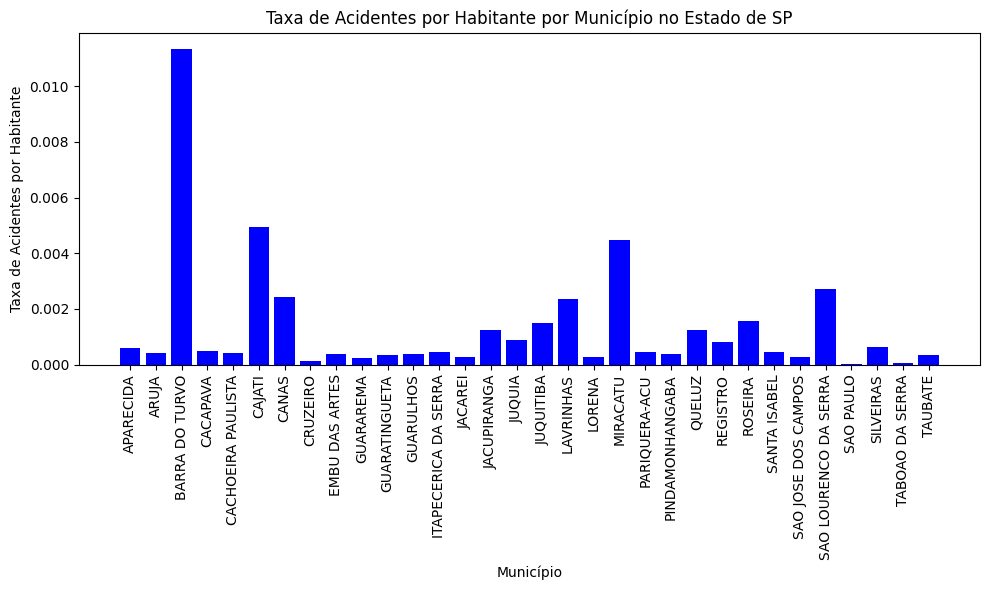

In [109]:
#Taxa de acidentes por habitante por município no estado de SP
acidentes_por_municipio = df_unido.groupby('nome_mun').size().reset_index(name='numero_acidentes')

dados_municipais = acidentes_por_municipio.merge(df_unido[['nome_mun', 'populacao']].drop_duplicates(), on='nome_mun')

dados_municipais['taxa_acidentes_por_habitante'] = dados_municipais['numero_acidentes'] / dados_municipais['populacao']

print(dados_municipais)

plt.figure(figsize=(10, 6))
plt.bar(dados_municipais['nome_mun'], dados_municipais['taxa_acidentes_por_habitante'], color='blue')
plt.xlabel('Município')
plt.ylabel('Taxa de Acidentes por Habitante')
plt.title('Taxa de Acidentes por Habitante por Município no Estado de SP')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()